In [140]:
import pandas as pd
import matplotlib.pyplot as plt

CLEAN DATA

In [141]:
df = pd.read_csv('Earthquakes_database.csv')
df.columns

Index(['Date', 'Time', 'Latitude', 'Longitude', 'Type', 'Depth', 'Depth Error',
       'Depth Seismic Stations', 'Magnitude', 'Magnitude Type',
       'Magnitude Error', 'Magnitude Seismic Stations', 'Azimuthal Gap',
       'Horizontal Distance', 'Horizontal Error', 'Root Mean Square', 'ID',
       'Source', 'Location Source', 'Magnitude Source', 'Status'],
      dtype='object')

In [142]:
# convert date and time columns
df['Date'] = pd.to_datetime(df['Date'], format='mixed', utc=True).dt.strftime('%Y/%m/%d')
df['Time'] = pd.to_datetime(df['Time'], format='mixed', utc=True).dt.strftime('%H:%M:%S')

In [143]:
# drop if there are any duplicate values
df.drop_duplicates(inplace=True)

CATEGORIZE

In [144]:
# divide depth into 3 categories based on its values: shallow, intermediate and deep
bins = [0, 70, 300, df['Depth'].max()]
labels = ['Shallow', 'Intermediate', 'Deep']
df['Depth Category'] = pd.cut(df['Depth'], bins=bins, labels=labels)
df

,Date,Time,Latitude,Longitude,Type,Depth,Depth Error,Depth Seismic Stations,Magnitude,Magnitude Type,...,Azimuthal Gap,Horizontal Distance,Horizontal Error,Root Mean Square,ID,Source,Location Source,Magnitude Source,Status,Depth Category
0,1965/01/02,13:44:18,19.2460,145.6160,Earthquake,131.60,NaN,NaN,6.0,MW,...,NaN,NaN,NaN,NaN,ISCGEM860706,ISCGEM,ISCGEM,ISCGEM,Automatic,Intermediate
1,1965/01/04,11:29:49,1.8630,127.3520,Earthquake,80.00,NaN,NaN,5.8,MW,...,NaN,NaN,NaN,NaN,ISCGEM860737,ISCGEM,ISCGEM,ISCGEM,Automatic,Intermediate
2,1965/01/05,18:05:58,-20.5790,-173.9720,Earthquake,20.00,NaN,NaN,6.2,MW,...,NaN,NaN,NaN,NaN,ISCGEM860762,ISCGEM,ISCGEM,ISCGEM,Automatic,Shallow
3,1965/01/08,18:49:43,-59.0760,-23.5570,Earthquake,15.00,NaN,NaN,5.8,MW,...,NaN,NaN,NaN,NaN,ISCGEM860856,ISCGEM,ISCGEM,ISCGEM,Automatic,Shallow
4,1965/01/09,13:32:50,11.9380,126.4270,Earthquake,15.00,NaN,NaN,5.8,MW,...,NaN,NaN,NaN,NaN,ISCGEM860890,ISCGEM,ISCGEM,ISCGEM,Automatic,Shallow
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23407,2016/12/28,08:22:12,38.3917,-118.8941,Earthquake,12.30,1.2,40.0,5.6,ML,...,42.47,0.120,NaN,0.1898,NN00570710,NN,NN,NN,Reviewed,Shallow
23408,2016/12/28,09:13:47,38.3777,-118.8957,Earthquake,8.80,2.0,33.0,5.5,ML,...,48.58,0.129,NaN,0.2187,NN00570744,NN,NN,NN,Reviewed,Shallow
23409,2016/12/28,12:38:51,36.9179,140.4262,Earthquake,10.00,1.8,NaN,5.9,MWW,...,91.00,0.992,4.8,1.5200,US10007NAF,US,US,US,Reviewed,Shallow
23410,2016/12/29,22:30:19,-9.0283,118.6639,Earthquake,79.00,1.8,NaN,6.3,MWW,...,26.00,3.553,6.0,1.4300,US10007NL0,US,US,US,Reviewed,Intermediate


DATA RESHAPING

In [145]:
melted_df = pd.melt(df, id_vars=['ID', 'Type', 'Date'], value_vars=['Magnitude', 'Depth Category'])
melted_df

,ID,Type,Date,variable,value
0,ISCGEM860706,Earthquake,1965/01/02,Magnitude,6.0
1,ISCGEM860737,Earthquake,1965/01/04,Magnitude,5.8
2,ISCGEM860762,Earthquake,1965/01/05,Magnitude,6.2
3,ISCGEM860856,Earthquake,1965/01/08,Magnitude,5.8
4,ISCGEM860890,Earthquake,1965/01/09,Magnitude,5.8
...,...,...,...,...,...
46819,NN00570710,Earthquake,2016/12/28,Depth Category,Shallow
46820,NN00570744,Earthquake,2016/12/28,Depth Category,Shallow
46821,US10007NAF,Earthquake,2016/12/28,Depth Category,Shallow
46822,US10007NL0,Earthquake,2016/12/29,Depth Category,Intermediate


In [146]:
pivot_table_df = df.pivot_table(values=['Magnitude', 'Depth'], index='Date', columns='Status')
pivot_table_df

Depth          Magnitude         
Status     Automatic Reviewed Automatic Reviewed
Date                                            
1965/01/02     131.6      NaN       6.0      NaN
1965/01/04      80.0      NaN       5.8      NaN
1965/01/05      20.0      NaN       6.2      NaN
1965/01/08      15.0      NaN       5.8      NaN
1965/01/09      15.0      NaN       5.8      NaN
...              ...      ...       ...      ...
2016/12/25       NaN   26.465       NaN     6.60
2016/12/27       NaN   97.000       NaN     5.60
2016/12/28       NaN   10.475       NaN     5.65
2016/12/29       NaN   79.000       NaN     6.30
2016/12/30       NaN   11.940       NaN     5.50

[12398 rows x 4 columns]

VISUALIZATION

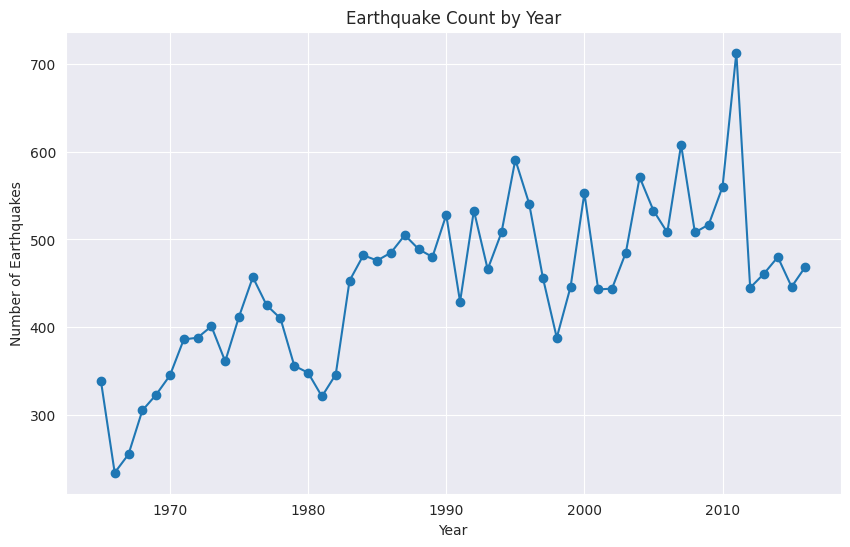

In [147]:
df['Date'] = pd.to_datetime(df['Date'])
df['Year'] = df['Date'].dt.year

earthquake_count = df['Year'].value_counts().sort_index()

plt.figure(figsize=(10, 6))
earthquake_count.plot(kind='line', marker='o')
plt.title('Earthquake Count by Year')
plt.xlabel('Year')
plt.ylabel('Number of Earthquakes')
plt.grid(True)
plt.show()


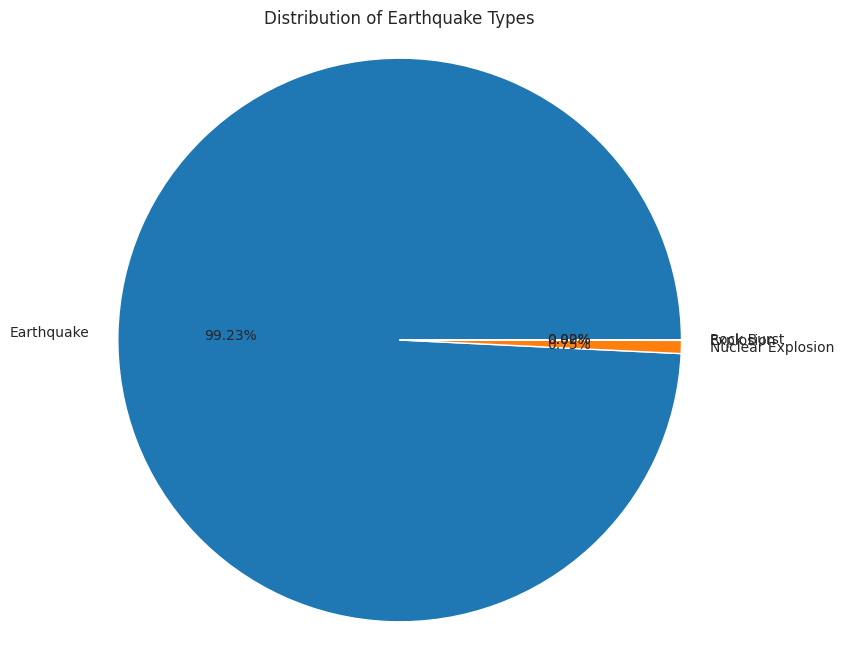

In [148]:
type_counts = df['Type'].value_counts()

plt.figure(figsize=(8, 8))
plt.pie(type_counts, labels=type_counts.index, autopct='%1.2f%%')
plt.title('Distribution of Earthquake Types')
plt.axis('equal')
plt.show()


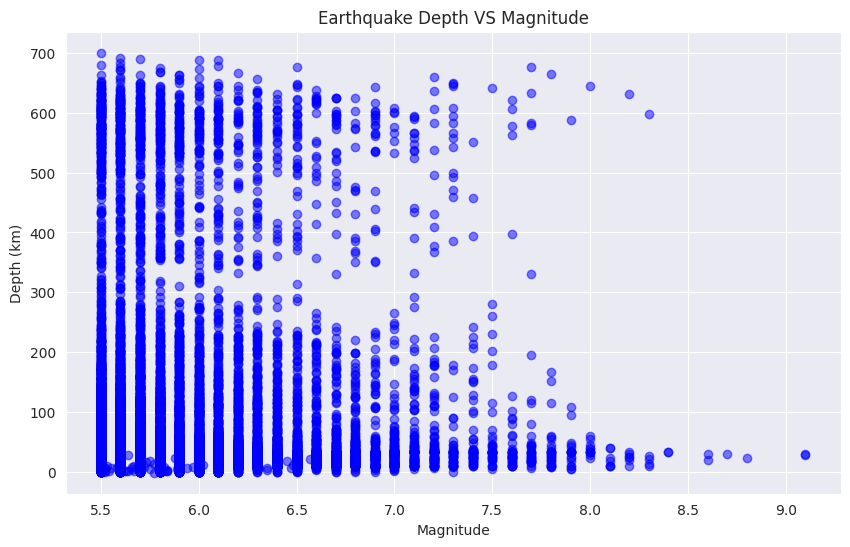

In [149]:
plt.figure(figsize=(10, 6))
plt.scatter(df['Magnitude'], df['Depth'], color='blue', alpha=0.5)
plt.title('Earthquake Depth VS Magnitude')
plt.xlabel('Magnitude')
plt.ylabel('Depth (km)')
plt.grid(True)
plt.show()


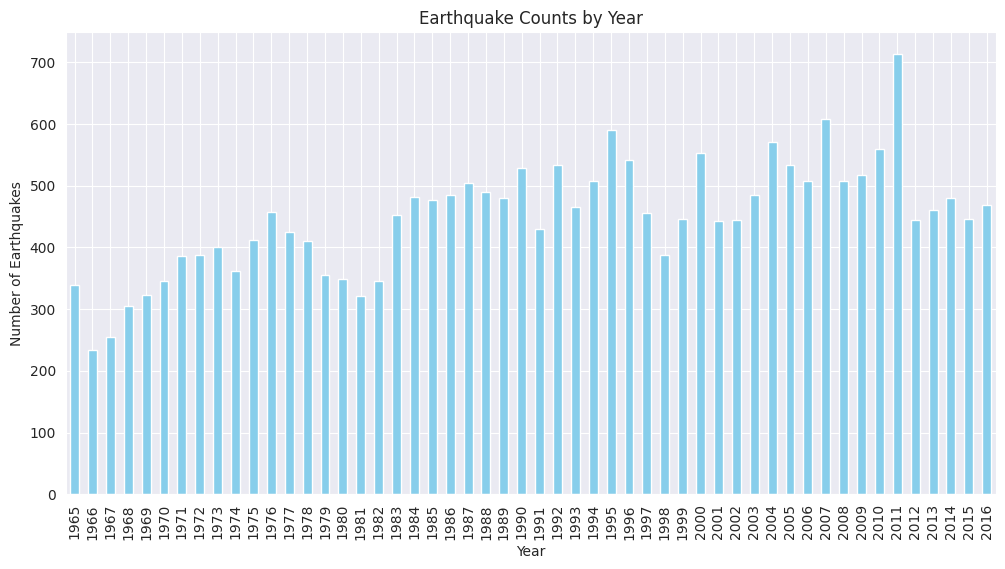

In [150]:
plt.figure(figsize=(12, 6))
df['Year'].value_counts().sort_index().plot(kind='bar', color='skyblue')
plt.title('Earthquake Counts by Year')
plt.xlabel('Year')
plt.ylabel('Number of Earthquakes')
plt.grid(True)
plt.show()

WORKING WITH DATES

In [151]:
df['Year'] = df['Date'].dt.year
df['Month'] = df['Date'].dt.month
df['Day'] = df['Date'].dt.day
df

,Date,Time,Latitude,Longitude,Type,Depth,Depth Error,Depth Seismic Stations,Magnitude,Magnitude Type,...,Root Mean Square,ID,Source,Location Source,Magnitude Source,Status,Depth Category,Year,Month,Day
0,1965-01-02,13:44:18,19.2460,145.6160,Earthquake,131.60,NaN,NaN,6.0,MW,...,NaN,ISCGEM860706,ISCGEM,ISCGEM,ISCGEM,Automatic,Intermediate,1965,1,2
1,1965-01-04,11:29:49,1.8630,127.3520,Earthquake,80.00,NaN,NaN,5.8,MW,...,NaN,ISCGEM860737,ISCGEM,ISCGEM,ISCGEM,Automatic,Intermediate,1965,1,4
2,1965-01-05,18:05:58,-20.5790,-173.9720,Earthquake,20.00,NaN,NaN,6.2,MW,...,NaN,ISCGEM860762,ISCGEM,ISCGEM,ISCGEM,Automatic,Shallow,1965,1,5
3,1965-01-08,18:49:43,-59.0760,-23.5570,Earthquake,15.00,NaN,NaN,5.8,MW,...,NaN,ISCGEM860856,ISCGEM,ISCGEM,ISCGEM,Automatic,Shallow,1965,1,8
4,1965-01-09,13:32:50,11.9380,126.4270,Earthquake,15.00,NaN,NaN,5.8,MW,...,NaN,ISCGEM860890,ISCGEM,ISCGEM,ISCGEM,Automatic,Shallow,1965,1,9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23407,2016-12-28,08:22:12,38.3917,-118.8941,Earthquake,12.30,1.2,40.0,5.6,ML,...,0.1898,NN00570710,NN,NN,NN,Reviewed,Shallow,2016,12,28
23408,2016-12-28,09:13:47,38.3777,-118.8957,Earthquake,8.80,2.0,33.0,5.5,ML,...,0.2187,NN00570744,NN,NN,NN,Reviewed,Shallow,2016,12,28
23409,2016-12-28,12:38:51,36.9179,140.4262,Earthquake,10.00,1.8,NaN,5.9,MWW,...,1.5200,US10007NAF,US,US,US,Reviewed,Shallow,2016,12,28
23410,2016-12-29,22:30:19,-9.0283,118.6639,Earthquake,79.00,1.8,NaN,6.3,MWW,...,1.4300,US10007NL0,US,US,US,Reviewed,Intermediate,2016,12,29


In [152]:
# Grouping and count earthquakes by year
earthquakes_per_year = df.groupby(pd.Grouper(key='Date', freq='YE')).size().reset_index(name='Earthquake Count')
earthquakes_per_year

,Date,Earthquake Count
0,1965-12-31,339
1,1966-12-31,234
2,1967-12-31,255
3,1968-12-31,305
4,1969-12-31,323
5,1970-12-31,345
6,1971-12-31,386
7,1972-12-31,388
8,1973-12-31,401
9,1974-12-31,361
